# Naive Bayes

## Importando as libs

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Base de dados risco credito - Exemplo didático

In [2]:
base_risco_credito = pd.read_csv('./data/03.risco_credito.csv')

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [4]:
# Tamanho da base de dados
base_risco_credito.shape

(14, 5)

In [5]:
# Descrição dos dados
base_risco_credito.describe()

,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,desconhecida,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


### Divisão entre previsores e classe

In [6]:
# Separando os valores preditores: 0 - historia; 1 - divida; 2 - garantias; 3 - renda.
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [7]:
# Separa os valores da label (classe): 4 - risco
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### Tratamento de valores categóricos

In [8]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [9]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [10]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [11]:
del label_encoder_historia, label_encoder_divida, label_encoder_garantia, label_encoder_renda

### Salvando a base de dados

In [12]:
with open('./data/risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

### Analise dos dados

In [13]:
# Instanciando o modelo Gaussian e o treinando
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

### Predições testes

In [14]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [15]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [16]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [17]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [18]:
del base_risco_credito, X_risco_credito, y_risco_credito
del naive_risco_credito, previsao

## Base credit data - Resultado da análise: 93.8%

### Importando a base de dados

In [19]:
with open('./data/credit.pkl', 'rb') as f:
    X_train_credit, y_train_credit, X_test_credit, y_test_credit = pickle.load(f)

In [20]:
X_train_credit.shape, y_train_credit.shape

((1500, 3), (1500,))

In [21]:
X_test_credit.shape, y_test_credit.shape

((500, 3), (500,))

### Experimentando o modelo

In [22]:
# Instanciando e treinando o modelo
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_train_credit, y_train_credit)

GaussianNB()

In [23]:
# Realizando as predições
y_pred = naive_credit_data.predict(X_test_credit)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
# Valores reais
y_test_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Análise dos resultados

In [25]:
accuracy_score(y_test_credit, y_pred)

0.938

In [26]:
confusion_matrix(y_test_credit, y_pred)

array([[428,   8],
       [ 23,  41]])

0.938

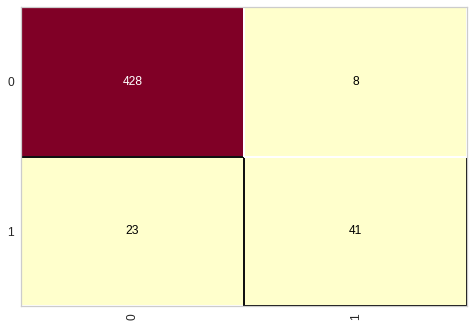

In [27]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_train_credit, y_train_credit)
cm.score(X_test_credit, y_test_credit)

- Precision: tenta responder à seguinte pergunta: Qual proporção de identificações positivas estava realmente correta? \
    A precisão é definida da seguinte forma:
    $$
        Precision = \frac{TP}{TP + FP}
    $$
    
- Recall: tenta responder à seguinte pergunta: Qual proporção de positivos reais foi identificada corretamente? \
    Matematicamente, a recall é definida da seguinte forma:
    $$
        Recall = \frac{TP}{TP + FN}
    $$

In [28]:
print(classification_report(y_test_credit, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [29]:
del X_train_credit, y_train_credit, X_test_credit, y_test_credit
del naive_credit_data, y_pred, cm

## Base census data - Resultado da análise: 47.6%

### Importando a base de dados

In [30]:
with open('./data/census.pkl', 'rb') as f:
    X_train_census, y_train_census, X_test_census, y_test_census = pickle.load(f)

In [31]:
X_train_census.shape, y_train_census.shape

((24420, 108), (24420,))

In [32]:
X_test_census.shape, y_test_census.shape

((8141, 108), (8141,))

### Experimentando o modelo

In [33]:
naive_census = GaussianNB()
naive_census.fit(X_train_census, y_train_census)

GaussianNB()

In [34]:
y_pred = naive_census.predict(X_test_census)
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
y_test_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

### Análise dos resultados

In [36]:
accuracy_score(y_test_census, y_pred)

0.4762314212013266

0.4762314212013266

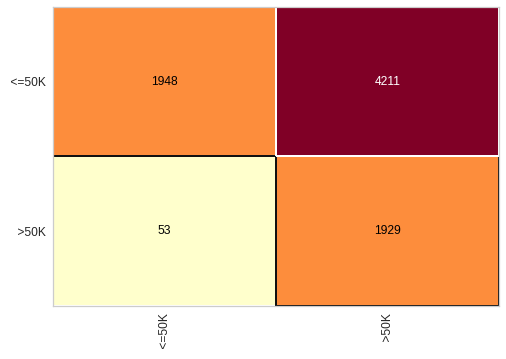

In [37]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_train_census, y_train_census)
cm.score(X_test_census, y_test_census)

In [38]:
print(classification_report(y_test_census, y_pred))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      6159
        >50K       0.31      0.97      0.48      1982

    accuracy                           0.48      8141
   macro avg       0.64      0.64      0.48      8141
weighted avg       0.81      0.48      0.48      8141



In [39]:
del X_train_census, y_train_census, X_test_census, y_test_census
del naive_census, y_pred, cm